# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017_df = pd.read_csv('sat_2017.csv')
act_2017_df = pd.read_csv('act_2017.csv')


read the csv

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017_df.head(10) #display data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017_df.head(10) #display data

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both datasets show the average SAT and ACT scores for each state respectively

#### 4a. Does the data look complete? 

In [5]:
print(sat_2017_df.shape)
print(act_2017_df.shape)

(51, 5)
(52, 7)


Answer: All 51 countries and test types seem to be present

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [6]:
sat_2017_df.min()#minimum values for SAT 2017

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [7]:
sat_2017_df.max()#maximum values for SAT 2017

State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

In [8]:
act_2017_df.min()#minimum values for ACT 2017

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [9]:
act_2017_df.max()#maximum values for ACT 2017

State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object

Answer: There seem to be abnormally low values present in the dataset

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
# the SAT 2017 column and the ACT 2017 science column has scores that are much smaller than the other scores
sat_2017_df.loc[sat_2017_df['Math']==52,'Math'] = 524
act_2017_df.loc[act_2017_df['Science']==2.3,'Science'] = 23.2

located erronous values and fixed them

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes. Participation is an 'object' type. In addition, Composite is also stored as an 'object' type instead of being stored as 'float64'

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#code
def percentage_converter(percent):
    try:
        return float(percent.replace('%',''))/100
    except:
        return percent
#this function will convert percentage values into floats

sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(percentage_converter)
act_2017_df['Participation'] = act_2017_df['Participation'].apply(percentage_converter)
#applies the percentage_converter function to every value in the 'Participation' for the sat_2017 and act_2017 dataframes

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
#code^
act_2017_df.loc[51,'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#code^
act_2017_df['Composite'] = act_2017_df['Composite'].apply(pd.to_numeric)
#applies the to_numeric function to every value in act_2017_df['Composite']

- Display the data types again to confirm they are correct.

In [16]:
#Code:
sat_2017_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [17]:
act_2017_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

after checking, the data types are now correct

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code
act_2017_df.rename(columns=lambda x:'act_2017_'+x.lower().replace(' ','_'),inplace=True)

# for the act_2017 dataframe, adds 'act_2017_' in front of column names and lowercases everything 
# while replacing all spaces with '_'.
act_2017_df.rename(columns={'act_2017_state':'state'},inplace=True)
act_2017_df.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [19]:
sat_2017_df.rename(columns=lambda x:'sat_2017_'+x.lower().replace(' ','_'),inplace=True)
# for the sat_2017 dataframe, adds 'sat_2017_' in front of column names and lowercases everything 
# while replacing all spaces with '_'.
sat_2017_df.rename(columns={'sat_2017_state':'state'},inplace=True)
sat_2017_df.head()

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


renamed all columns to have relevant names

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|SAT|Which state the scores are from|
|sat_2017_participation|*float*|SAT|Participation rate of the state for the 2017 sat (represents a percentage, ranges from 0 to 1)|
|sat_2017_evidence-based_reading_and_writing|*int*|SAT|evidence based reading and writing scores for the 2017 sat (max score is 800)|
|sat_2017_math|*int*|SAT|math scores for the 2017 sat (max score is 800)|
|sat_2017_total|*int*|SAT|total scores for the 2017 sat (max score is 1600, attained by the sum of all other sat scores)|
|act_2017_participation|*float*|ACT|Participation rate of the state for the 2017 act (represents a percentage, ranges from 0 to 1)|
|act_2017_english|*float*|ACT|english scores for the 2017 act (max score is 36)|
|act_2017_math|*float*|ACT|math scores for the 2017 act (max score is 36)|
|act_2017_reading|*float*|ACT|reading scores for the 2017 act (max score is 36)|
|act_2017_science|*float*|ACT|science scores for the 2017 act (max score is 36)|
|act_2017_composite|*float*|ACT|composite scores for the 2017 act (max score is 36, it is the average of all other act scores)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
act_2017_df.drop(0,inplace = True)
# act_2017 has and extra state 'national' which sat_2017 does not have. index 0 in the act_2017 df was dropped as it was located there

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_2017_df = pd.merge(sat_2017_df, act_2017_df, on='state') # merge both dataframes based on the 'state column'
combined_2017_df.head()

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#code
combined_2017_df.to_csv('combined_2017.csv')
#saved as a csv file

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
sat_2018_df = pd.read_csv('sat_2018.csv')
act_2018_df = pd.read_csv('act_2018_updated.csv')

In [24]:
sat_2018_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [25]:
act_2018_df.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [26]:
sat_2018_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [27]:
act_2018_df.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [28]:
act_2018_df.rename(columns={'State':'State','Percentage of Students Tested':'Participation','Average Composite Score':'Composite'
                            ,'Average English Score':'English','Average Math Score':'Math'
                              ,'Average Reading Score':'Reading','Average Science Score':'Science'},inplace=True)

act_2018_df = act_2018_df[['State','Participation','English','Math','Reading','Science','Composite']]

act_2018_df['Participation'] = act_2018_df['Participation']/100
act_2018_df.rename(columns=lambda x:'act_2018_'+x.lower().replace(' ','_'),inplace=True)
act_2018_df.rename(columns={'act_2018_state':'state'},inplace=True)

act_2018_df.head()


,state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [29]:
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(percentage_converter)

sat_2018_df.rename(columns=lambda x:'sat_2018_'+x.lower().replace(' ','_'),inplace=True)
sat_2018_df.rename(columns={'sat_2018_state':'state'},inplace=True)

sat_2018_df.head()


,state,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


function created above is applied to these two dataframes to remove % and change dtype

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [30]:
final_df = pd.merge(combined_2017_df, sat_2018_df, on='state')
final_df = pd.merge(final_df, act_2018_df, on='state')
final_df.head()

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


In [31]:
final_df.to_csv('final.csv', index =False)

merged all dataframes together for future use

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
final_df = pd.read_csv('final.csv')

In [33]:
#Code:
final_df.describe()

,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [34]:
def std_dev(x):
    mean = np.mean(x)
    values_minus_mean_squared = [(i-mean)**2 for i in x]
    variance= sum(values_minus_mean_squared)/len(x)
    standard_deviation = variance**0.5
    return standard_deviation

num_final_df = final_df.iloc[:,1:]

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [35]:
#Code: Dictionary map to sd, with the columns being the keys and the sd being the values
sd = {key:round(value,3) for key,value in 
      zip(num_final_df,num_final_df.apply(std_dev))} #uses dict comprehension to use df column name as key and its sd as values

sd

{'sat_2017_participation': 0.349,
 'sat_2017_evidence-based_reading_and_writing': 45.217,
 'sat_2017_math': 46.657,
 'sat_2017_total': 91.584,
 'act_2017_participation': 0.318,
 'act_2017_english': 2.33,
 'act_2017_math': 1.962,
 'act_2017_reading': 2.047,
 'act_2017_science': 1.722,
 'act_2017_composite': 2.001,
 'sat_2018_participation': 0.369,
 'sat_2018_evidence-based_reading_and_writing': 47.035,
 'sat_2018_math': 47.302,
 'sat_2018_total': 93.227,
 'act_2018_participation': 0.337,
 'act_2018_english': 2.422,
 'act_2018_math': 2.016,
 'act_2018_reading': 2.146,
 'act_2018_science': 1.852,
 'act_2018_composite': 2.086}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [36]:
num_final_df.agg('std')

sat_2017_participation                          0.352766
sat_2017_evidence-based_reading_and_writing    45.666901
sat_2017_math                                  47.121395
sat_2017_total                                 92.494812
act_2017_participation                          0.321408
act_2017_english                                2.353677
act_2017_math                                   1.981989
act_2017_reading                                2.067271
act_2017_science                                1.739353
act_2017_composite                              2.020695
sat_2018_participation                          0.373143
sat_2018_evidence-based_reading_and_writing    47.502627
sat_2018_math                                  47.772623
sat_2018_total                                 94.155083
act_2018_participation                          0.340810
act_2018_english                                2.446356
act_2018_math                                   2.035765
act_2018_reading               

In [37]:
num_final_df.apply(np.std)

sat_2017_participation                          0.349291
sat_2017_evidence-based_reading_and_writing    45.216970
sat_2017_math                                  46.657134
sat_2017_total                                 91.583511
act_2017_participation                          0.318242
act_2017_english                                2.330488
act_2017_math                                   1.962462
act_2017_reading                                2.046903
act_2017_science                                1.722216
act_2017_composite                              2.000786
sat_2018_participation                          0.369466
sat_2018_evidence-based_reading_and_writing    47.034610
sat_2018_math                                  47.301946
sat_2018_total                                 93.227424
act_2018_participation                          0.337452
act_2018_english                                2.422254
act_2018_math                                   2.015707
act_2018_reading               

Answer:
The manually calculated standard deviation matches that of the np.std method but not the pandas calculated standard deviation

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### SAT 2017 lowest and highest participation rates

In [38]:
part_cols = ['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']
min_max_part={col:{'max':final_df[col].max(),'min':final_df[col].min()} for col in part_cols} 
#creates a dictionary of max and min values for each participation column
min_max_part

sat_2017_high_low = final_df[['state','sat_2017_participation']].loc[(final_df['sat_2017_participation']== 
                                                 min_max_part['sat_2017_participation']['max'])|
                                                 (final_df['sat_2017_participation']== 
                                                 min_max_part['sat_2017_participation']['min'])]
sat_2017_high_low.sort_values("sat_2017_participation", axis = 0, ascending = True, inplace = True)
sat_2017_high_low

,state,sat_2017_participation
15,Iowa,0.02
24,Mississippi,0.02
34,North Dakota,0.02
6,Connecticut,1.00
7,Delaware,1.00
8,District of Columbia,1.00
22,Michigan,1.00


### ACT 2017 lowest and highest participation rates

In [39]:
act_2017_high_low = final_df[['state','act_2017_participation']].loc[(final_df['act_2017_participation']== 
                                                 min_max_part['act_2017_participation']['max'])|
                                                 (final_df['act_2017_participation']== 
                                                 min_max_part['act_2017_participation']['min'])]
act_2017_high_low.sort_values("act_2017_participation", axis = 0, ascending = True, inplace = True)
act_2017_high_low

,state,act_2017_participation
19,Maine,0.08
0,Alabama,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00
25,Missouri,1.00


### SAT 2018 lowest and highest participation rates

In [40]:
sat_2018_high_low = final_df[['state','sat_2018_participation']].loc[(final_df['sat_2018_participation']== 
                                                 min_max_part['sat_2018_participation']['max'])|
                                                 (final_df['sat_2018_participation']== 
                                                 min_max_part['sat_2018_participation']['min'])]
sat_2018_high_low.sort_values("sat_2018_participation", axis = 0, ascending = True, inplace = True)
sat_2018_high_low

,state,sat_2018_participation
34,North Dakota,0.02
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
12,Idaho,1.00
22,Michigan,1.00


### ACT 2018 lowest and highest participation rates

In [41]:
act_2018_high_low = final_df[['state','act_2018_participation']].loc[(final_df['act_2018_participation']== 
                                                 min_max_part['act_2018_participation']['max'])|
                                                 (final_df['act_2018_participation']== 
                                                 min_max_part['act_2018_participation']['min'])]
act_2018_high_low.sort_values("act_2018_participation", axis = 0, ascending = True, inplace = True)
act_2018_high_low

,state,act_2018_participation
19,Maine,0.07
0,Alabama,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00
27,Nebraska,1.00


### SAT 2017 lowest and highest total scores

In [42]:
comp_cols = ['sat_2017_total','act_2017_composite','sat_2018_total','act_2018_composite']
min_max_comp={col:{'max':final_df[col].max(),'min':final_df[col].min()} for col in comp_cols}

sat_2017_high_low_comp = final_df[['state','sat_2017_total']].loc[(final_df['sat_2017_total']== 
                                                 min_max_comp['sat_2017_total']['max'])|
                                                 (final_df['sat_2017_total']== 
                                                 min_max_comp['sat_2017_total']['min'])]
sat_2017_high_low_comp.sort_values("sat_2017_total", axis = 0, ascending = True, inplace = True)
sat_2017_high_low_comp

,state,sat_2017_total
8,District of Columbia,950
23,Minnesota,1295


### ACT 2017 lowest and highest composite scores

In [43]:
act_2017_high_low_comp = final_df[['state','act_2017_composite']].loc[(final_df['act_2017_composite']== 
                                                 min_max_comp['act_2017_composite']['max'])|
                                                 (final_df['act_2017_composite']== 
                                                 min_max_comp['act_2017_composite']['min'])]
act_2017_high_low_comp.sort_values("act_2017_composite", axis = 0, ascending = True, inplace = True)
act_2017_high_low_comp

,state,act_2017_composite
28,Nevada,17.8
29,New Hampshire,25.5


### SAT 2018 lowest and highest total scores

In [44]:
sat_2018_high_low_comp = final_df[['state','sat_2018_total']].loc[(final_df['sat_2018_total']== 
                                                 min_max_comp['sat_2018_total']['max'])|
                                                 (final_df['sat_2018_total']== 
                                                 min_max_comp['sat_2018_total']['min'])]
sat_2018_high_low_comp.sort_values("sat_2018_total", axis = 0, ascending = True, inplace = True)
sat_2018_high_low_comp

,state,sat_2018_total
8,District of Columbia,977
23,Minnesota,1298


### ACT 2018 lowest and highest composite scores

In [45]:
act_2018_high_low_comp = final_df[['state','act_2018_composite']].loc[(final_df['act_2018_composite']== 
                                                 min_max_comp['act_2018_composite']['max'])|
                                                 (final_df['act_2018_composite']== 
                                                 min_max_comp['act_2018_composite']['min'])]
act_2018_high_low_comp.sort_values("act_2018_composite", axis = 0, ascending = True, inplace = True)
act_2018_high_low_comp

,state,act_2018_composite
28,Nevada,17.7
6,Connecticut,25.6


### States which dropped from 100% SAT participation rate 

In [46]:
sat_condition = (final_df['sat_2017_participation']==1) & (final_df['sat_2018_participation']!=1)
final_df[sat_condition]

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
8,District of Columbia,1.0,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,23.7,22.7,24.4,23.0,23.6


### States which dropped from 100% ACT participation rate 

In [47]:
act_condition = (final_df['act_2017_participation']==1) & (final_df['act_2018_participation']!=1)
final_df[act_condition]

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,23.2,24.4,23.5,23.9
23,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,...,0.04,643,655,1298,0.99,20.2,21.4,21.7,21.4,21.3


### More than 50% SAT participation rate for both years

In [48]:
abv_50_for_2017 = (final_df['act_2017_participation']>0.5) & (final_df['sat_2017_participation']>0.5)

final_df[abv_50_for_2017]

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.2,19.3,21.1,19.5,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,20.9,20.7,21.2,21.4,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,480,530,1010,0.89,18.2,19.0,19.1,19.0,18.9


### More than 50% ACT participation rate for both years

In [49]:
abv_50_for_2018 = (final_df['act_2018_participation']>0.5) & (final_df['sat_2018_participation']>0.5)

final_df[abv_50_for_2018]

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_participation,sat_2018_evidence-based_reading_and_writing,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.2,19.3,21.1,19.5,19.9
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,20.9,20.7,21.2,21.4,21.4
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,480,530,1010,0.89,18.2,19.0,19.1,19.0,18.9
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,...,0.52,554,543,1098,1.00,18.0,19.3,19.5,19.2,19.1
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,17.3,18.2,18.6,18.5,18.3


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1, 'SAT and ACT correlation heatmap')

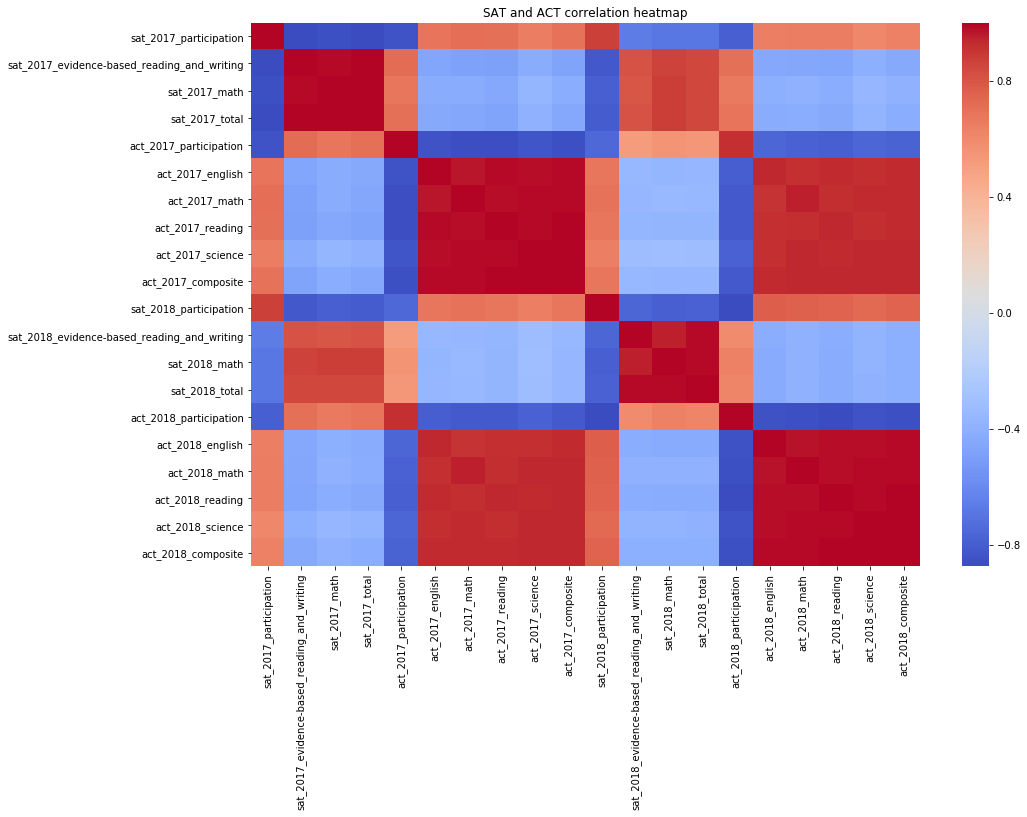

In [50]:
num_final_df = final_df.select_dtypes(include=[np.number])
fig = plt.figure(figsize=(15,10))
sns.heatmap(num_final_df.corr(),cmap = "coolwarm")
plt.title('SAT and ACT correlation heatmap')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [51]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,10),constrained_layout = True,sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = 'brygcm'
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color=colors[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [52]:
column_names= ['sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']
graph_titles = ['sat 2017','act 2017','sat 2018','act 2018']
x_labels = ['participation rate (%)','participation rate (%)','participation rate (%)','participation rate (%)']

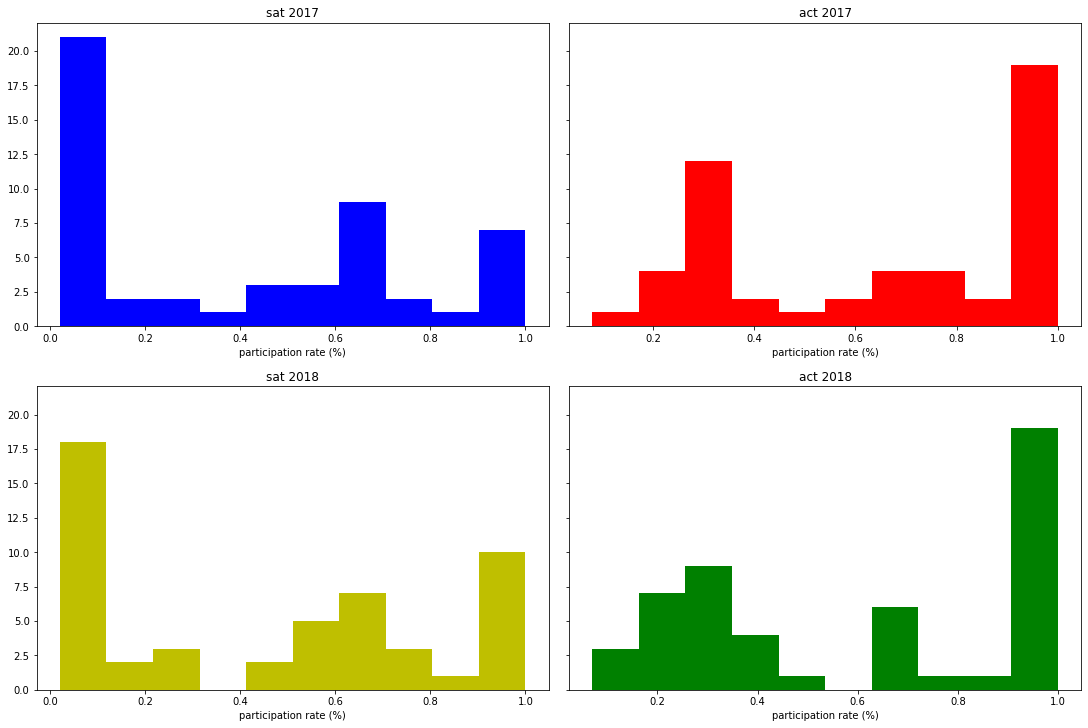

In [53]:
# Code
subplot_histograms(final_df,column_names,graph_titles,x_labels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [54]:
# Code
def subplot_scatter(dataframe, list_of_x_columns, list_of_y_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    fig, ax = plt.subplots(nrows=len(list_of_x_columns), ncols=1, figsize = (15,15), constrained_layout = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = 'brygc'
    for i, column in enumerate(zip(list_of_x_columns,list_of_y_columns)): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column[0]],dataframe[column[1]],color = colors[i]) 
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        
    fig.suptitle('SAT and ACT comparisons')

x_column_names = ['sat_2017_math','sat_2017_evidence-based_reading_and_writing','sat_2017_total','sat_2017_total', 'act_2017_composite']
x_labels = ['sat_2017_math','sat_2017_evidence-based_reading_and_writing','sat_2017_total','sat_2017_total', 'act_2017_composite']
y_column_names = ['act_2017_math','act_2017_reading','act_2017_composite','sat_2018_total','act_2018_composite']
y_labels = ['act_2017_math','act_2017_reading','act_2017_composite','sat_2018_total','act_2018_composite']
graph_titles = ['SAT vs. ACT math scores for 2017','SAT vs. ACT verbal/reading scores for 2017',
                'SAT vs. ACT total/composite scores for 2017',
                'Total scores for SAT 2017 vs. 2018','Composite scores for ACT 2017 vs. 2018']
#create lists to be iterated into function

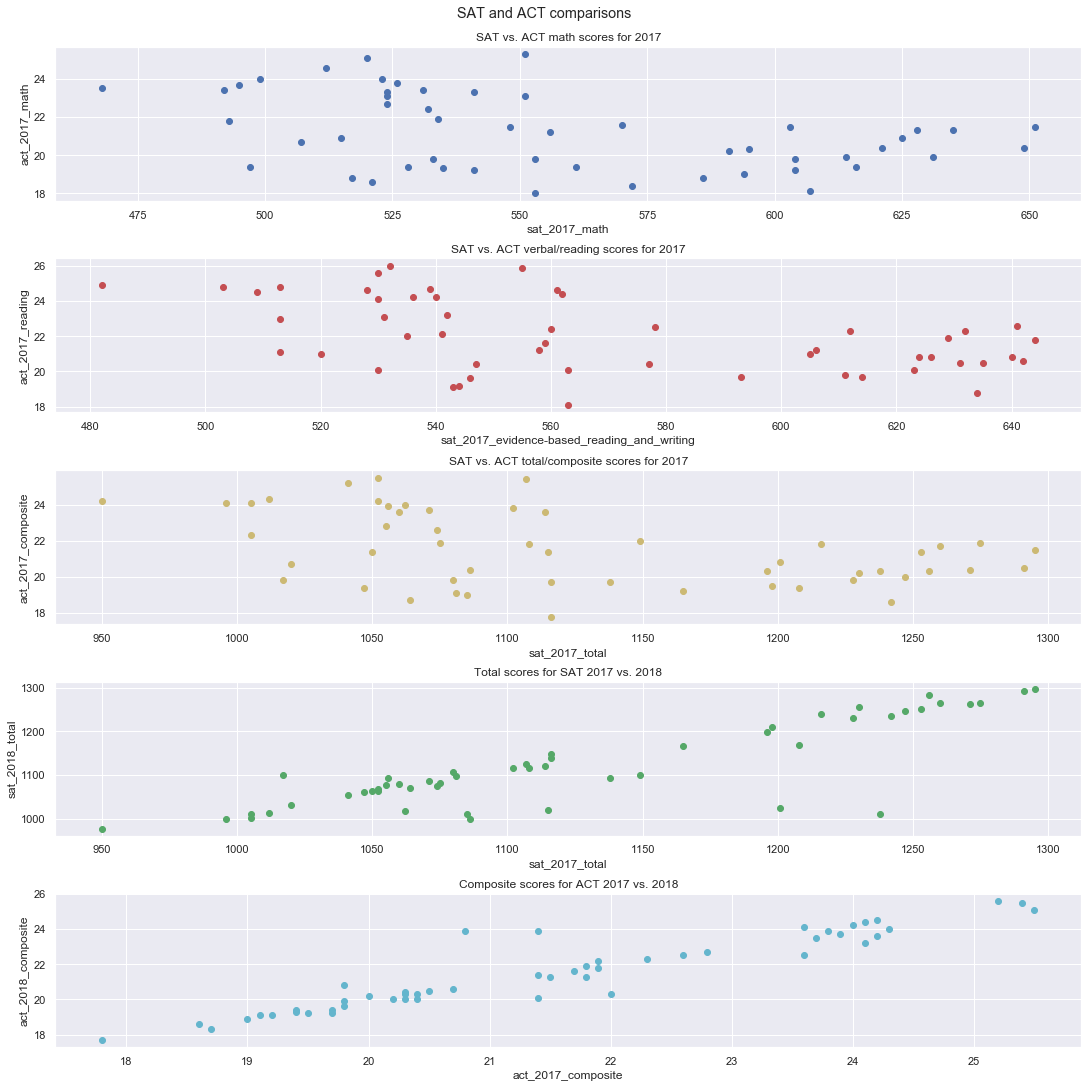

In [55]:
sns.set()
subplot_scatter(final_df,x_column_names,y_column_names, graph_titles,x_labels,y_labels)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [56]:
# creating dataframes that allows sns.boxplots to plot multiple columns with simillar scales

sat_act_part = pd.melt(final_df, id_vars =['state'], value_vars =['sat_2017_participation', 'sat_2018_participation','act_2017_participation','act_2018_participation'])


Text(0, 0.5, 'Participation rate')

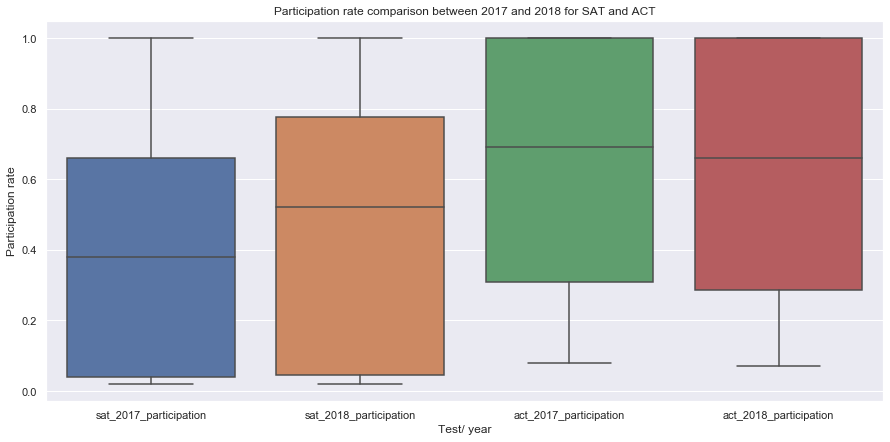

In [57]:
fig = plt.figure(figsize=(15,7))
sns.boxplot(x='variable',y='value',data=sat_act_part)
plt.title('Participation rate comparison between 2017 and 2018 for SAT and ACT')
plt.xlabel('Test/ year')
plt.ylabel('Participation rate')

In [58]:
sat_math_reading = pd.melt(final_df, id_vars =['state'], value_vars =['sat_2017_math','sat_2017_evidence-based_reading_and_writing',
                                                                      'sat_2018_math','sat_2018_evidence-based_reading_and_writing'])
sat_total = pd.melt(final_df, id_vars =['state'], value_vars =['sat_2017_total','sat_2018_total'])
#melt df so that sns boxplot can use it

Text(0, 0.5, 'test scores')

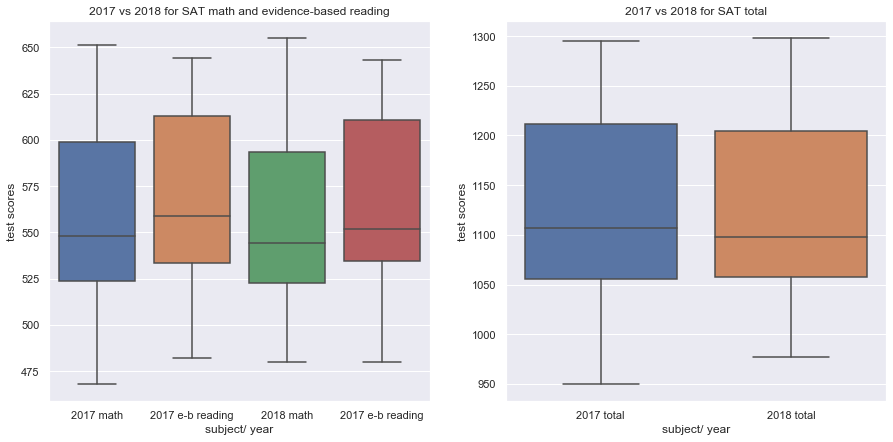

In [59]:
fig = plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
sns.boxplot(x='variable',y='value',data=sat_math_reading)
plt.xticks(np.arange(4), ('2017 math', '2017 e-b reading', '2018 math', '2017 e-b reading'))
plt.title('2017 vs 2018 for SAT math and evidence-based reading')
plt.xlabel('subject/ year')
plt.ylabel('test scores')


plt.subplot(1,2,2)
sns.boxplot(x='variable',y='value',data=sat_total)

plt.xticks(np.arange(2), ('2017 total', '2018 total'))
plt.title('2017 vs 2018 for SAT total')
plt.xlabel('subject/ year')
plt.ylabel('test scores')

In [60]:
act_english_math_reading_science_comp = pd.melt(final_df, id_vars =['state'], value_vars =['act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite',
                                                                                           'act_2018_english','act_2018_math','act_2018_reading','act_2018_science','act_2018_composite'])
#melt df so that sns boxplot can use it

Text(0, 0.5, 'test scores')

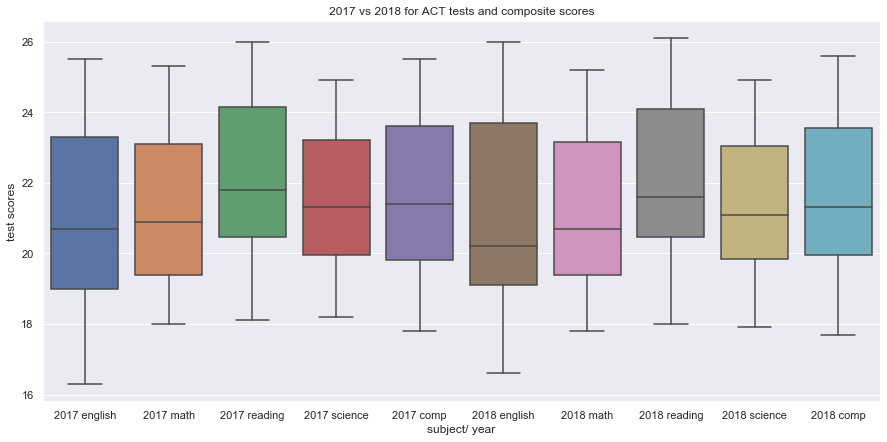

In [61]:
fig = plt.figure(figsize=(15,7))

sns.boxplot(x='variable',y='value',data=act_english_math_reading_science_comp)
plt.xticks(np.arange(10), ('2017 english', '2017 math', '2017 reading', '2017 science', '2017 comp',
                           '2018 english', '2018 math', '2018 reading', '2018 science', '2018 comp'))
plt.title('2017 vs 2018 for ACT tests and composite scores')
plt.xlabel('subject/ year')
plt.ylabel('test scores')


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [62]:
sat_scores = ['sat_2017_math','sat_2018_math','sat_2017_evidence-based_reading_and_writing',
              'sat_2018_evidence-based_reading_and_writing','sat_2017_total','sat_2018_total',]
sat_titles = ['2017 math','2018 math','2017 evidence-based reading and writing',
              '2018 evidence-based reading and writing','2017 total','2018 total',]
sat_xlabels = ['2017 scores','2018 scores','2017 scores','2018 scores','2017 scores','2018 scores',]

In [63]:
def subplot_histograms_sns(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,15), constrained_layout = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = 'bbrryyggccmm'
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column],ax=ax[i],bins=10,color=colors[i]) # feel free to add more settings
        
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

### Distribution of SAT scores

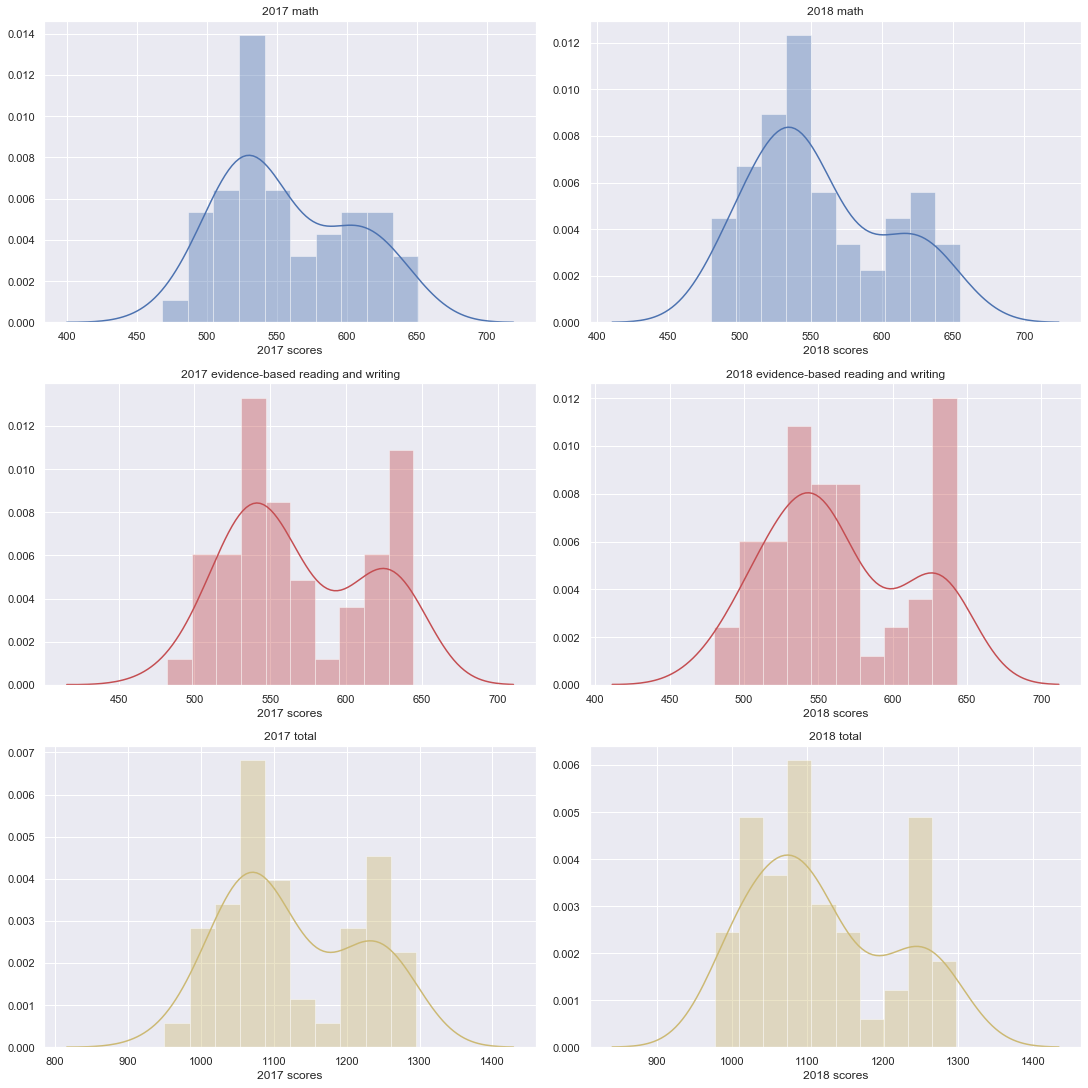

In [64]:
subplot_histograms_sns(num_final_df, sat_scores, sat_titles, sat_xlabels)

In [65]:
act_scores = ['act_2017_english','act_2018_english','act_2017_math','act_2018_math',
              'act_2017_reading','act_2018_reading','act_2017_science','act_2018_science',
              'act_2017_composite','act_2018_composite']
act_title = ['2017 english','2018 english','2017 math','2018 math',
              '2017 reading',' 2018 reading',' 2017 science','2018 science',
              '2017 composite','2018 composite']
act_xlabel = ['2017 scores','2018 scores','2017 scores','2018 scores','2017 scores','2018 scores','2017 scores','2018 scores','2017 scores','2018 scores',]

### Distribution of ACT scores

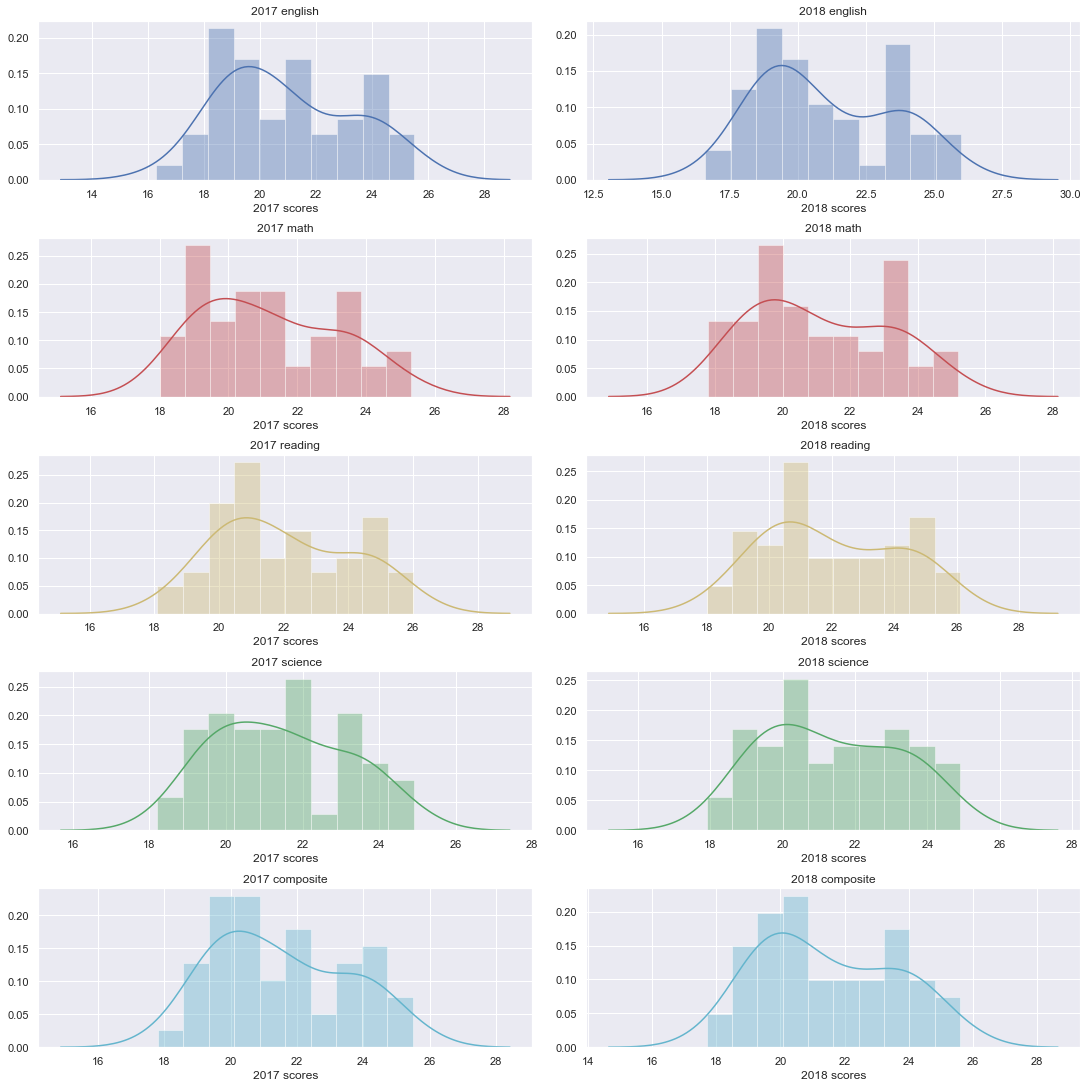

In [66]:
subplot_histograms_sns(num_final_df, act_scores, act_title, act_xlabel)

The SAT and ACT scores graphs are fairly normal with the exception of a few bins at the end which are affecting the distribution curve. it is likely that there is a reason that that many states would fall under that category.

### Year by year comparison for SAT total scores for every state. Colorado, Utah and Illinois seem to have noticeable shifts in scores

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


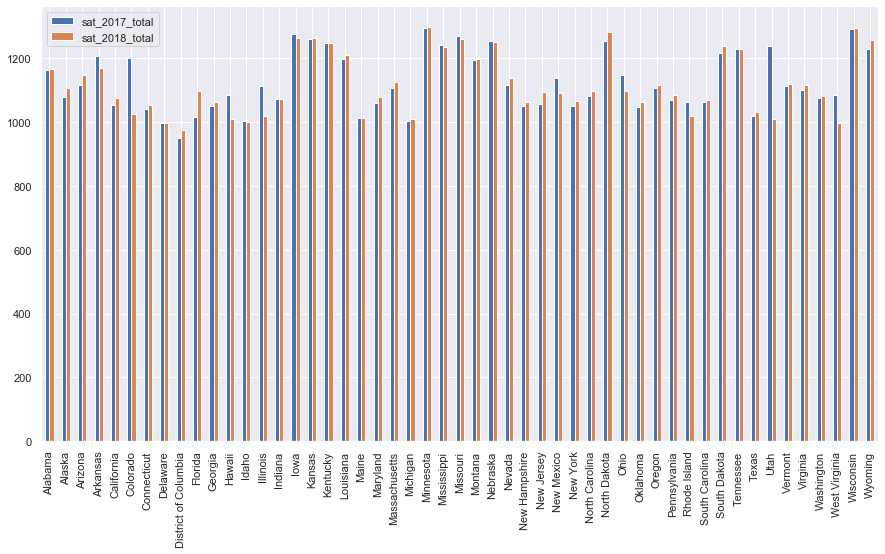

In [67]:
sat_filter_df = final_df.loc[:,~final_df.columns.str.contains('act_201')] #retain columns not containing act
sat_filter_df.drop(columns=['sat_2017_participation','sat_2018_participation'],inplace=True)
sat_filter_total_df = sat_filter_df [['state','sat_2017_total','sat_2018_total']]


fig, ax = plt.subplots()
sat_filter_total_df.plot(kind='bar',figsize=(15,8),ax=ax);
ax.set_xticklabels(sat_filter_total_df.state);


### Year by year comparison for ACT total scores for every state.  Nebraska, Colorado and Illinois seem to have noticeable shifts in scores

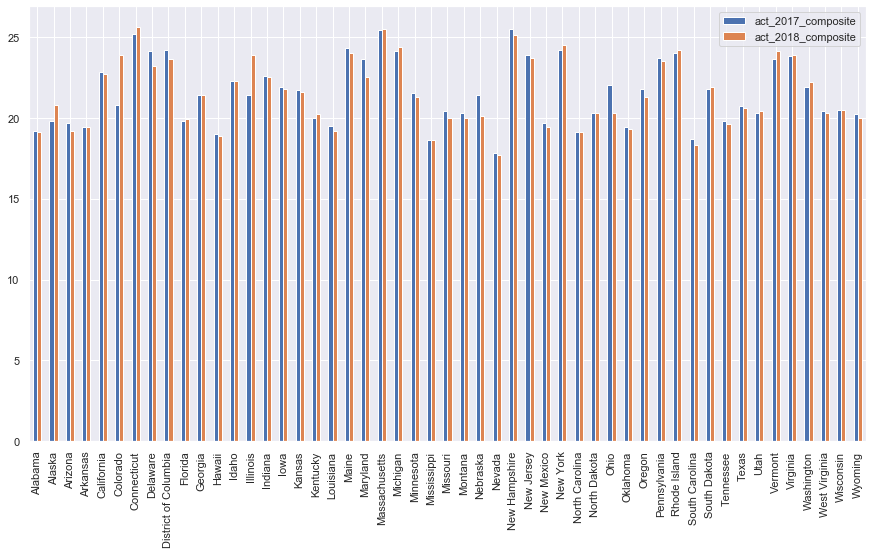

In [68]:
act_filter_df = final_df.loc[:,~final_df.columns.str.contains('sat_201')]
act_filter_df.drop(columns=['act_2017_participation','act_2018_participation'],inplace=True)
act_filter_comp_df = act_filter_df [['state','act_2017_composite','act_2018_composite']]


fig, ax = plt.subplots()
act_filter_comp_df.plot(kind='bar',figsize=(15,8),ax=ax);
ax.set_xticklabels(act_filter_comp_df.state);


### Correlation matrix for each variable 

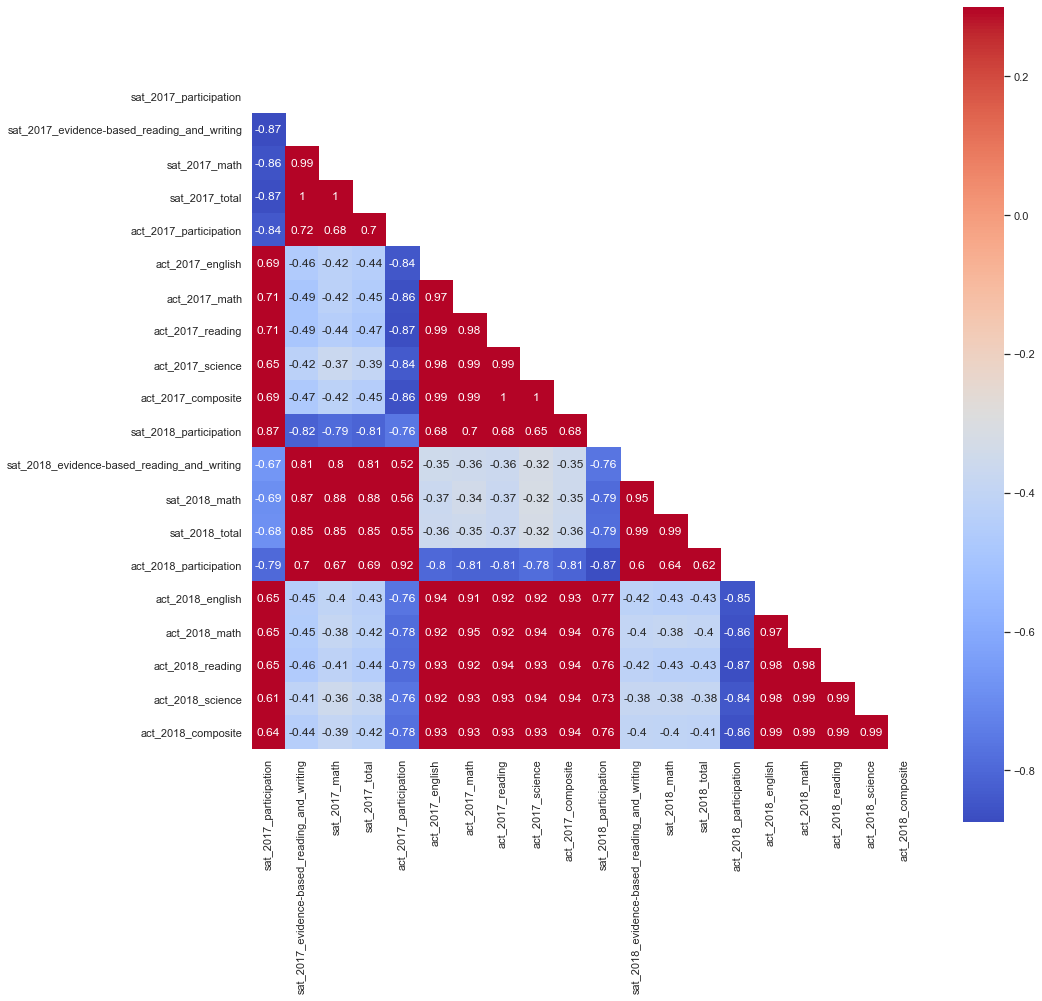

In [69]:
plt.figure(figsize=(15,15))


mask = np.zeros_like(num_final_df.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(num_final_df.corr(), mask=mask, vmax=.3, square=True, annot=True,cmap='coolwarm')

From what we can see, the same cluster of items tend to be colored. Participation in 1 test is negatively correlated with participation in the other. Scores in one test is also negatively correlated with the other.

### Pairplot

In [70]:
# sns.pairplot(num_final_df);

Paints a simillar picture to the graph above

In [71]:
participation_x=['sat_2017_participation', 'sat_2018_participation', 'sat_2017_participation', 'act_2017_participation',]
participation_y=['act_2017_participation', 'act_2018_participation', 'sat_2018_participation', 'act_2018_participation',]

part_x_labels = ['sat_2017_participation', 'sat_2018_participation', 'sat_2017_participation', 'act_2017_participation',]

part_y_labels = ['act_2017_participation', 'act_2018_participation', 'sat_2018_participation', 'act_2018_participation',]
part_graph_titles = ['SAT vs. ACT participation for 2017','SAT vs. ACT participation for 2018',
                'SAT 2017 vs. SAT 2018 participation',
                'ACT 2017 vs. ACT 2018 participation']

In [72]:
scores_x=['sat_2017_total','act_2017_composite', 'sat_2017_total','act_2017_composite','sat_2017_total','sat_2018_total',]
scores_y=['sat_2017_participation','act_2017_participation', 'act_2017_participation','sat_2017_participation','act_2017_composite','act_2018_composite',]

scores_x_labels=['sat_2017_total','act_2017_composite', 'sat_2017_total','act_2017_composite','sat_2017_total','sat_2018_total',]
scores_y_labels=['sat_2017_participation','act_2017_participation', 'act_2017_participation','sat_2017_participation','act_2017_composite','act_2018_composite',]

scores_titles=['sat_2017_total','act_2017_composite', 'sat_2017_total','act_2017_composite','sat_2017_total','sat_2018_total',]



In [73]:
def subplot_regplot_sns(dataframe, list_of_x_columns, list_of_y_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows =int(np.ceil(len(list_of_x_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (15,15), constrained_layout = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = 'brygcm'
    for i, column in enumerate(zip(list_of_x_columns,list_of_y_columns)): # Gives us an index value to get into all our lists
        sns.regplot(list_of_x_columns[i],list_of_y_columns[i],dataframe,color=colors[i],ax=ax[i])
#         ax[i].scatter(dataframe[column[0]],dataframe[column[1]],color = colors[i]) # feel free to add more settings
#         ax[i].set_title(list_of_titles[i])
#         ax[i].set_xlabel(list_of_xlabels[i])
#         ax[i].set_ylabel(list_of_ylabels[i])
        # Set titles, labels, etc here for each subplot
    fig.suptitle('Trends in total scores')




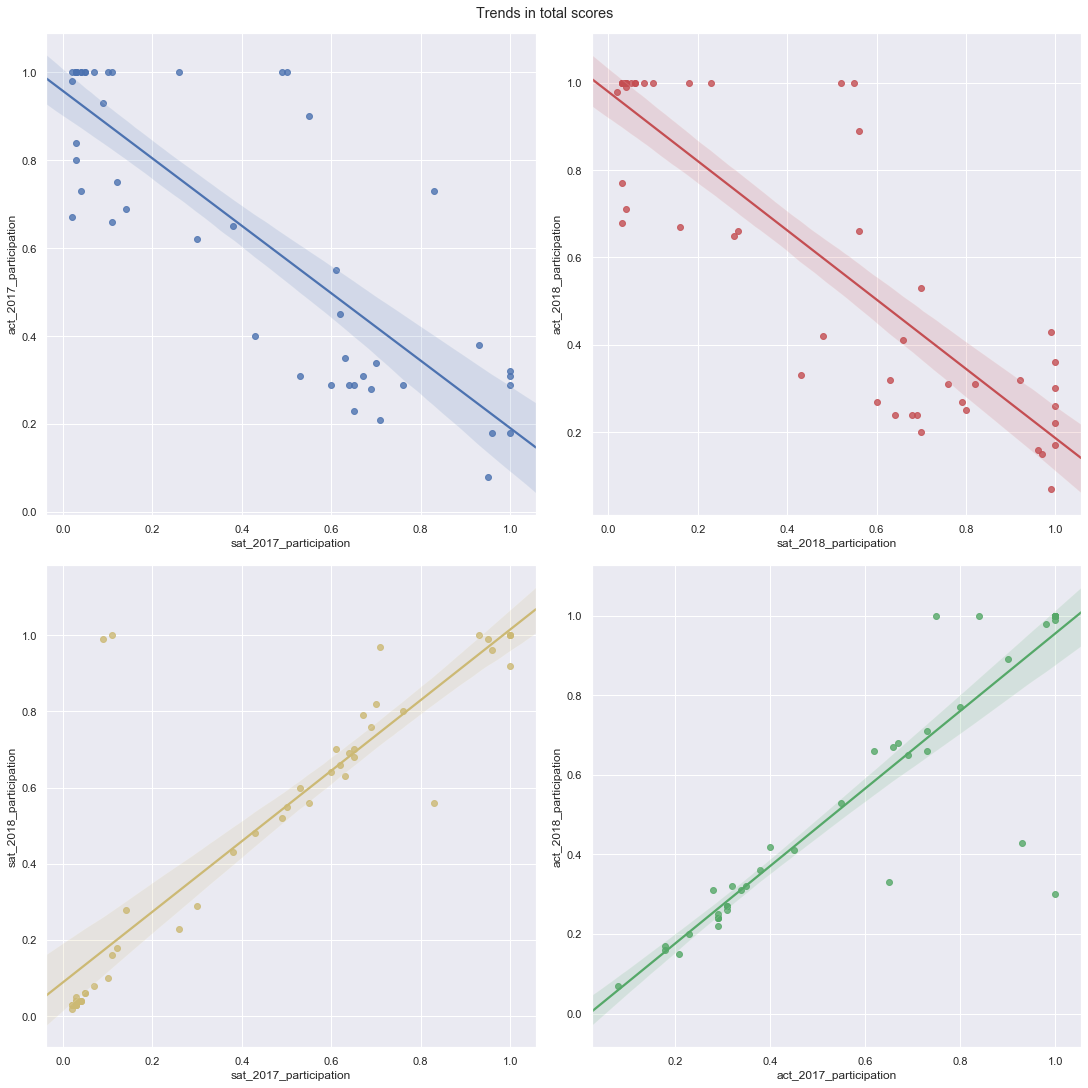

In [74]:
subplot_regplot_sns(final_df,participation_x,participation_y,part_graph_titles,part_x_labels,part_y_labels)

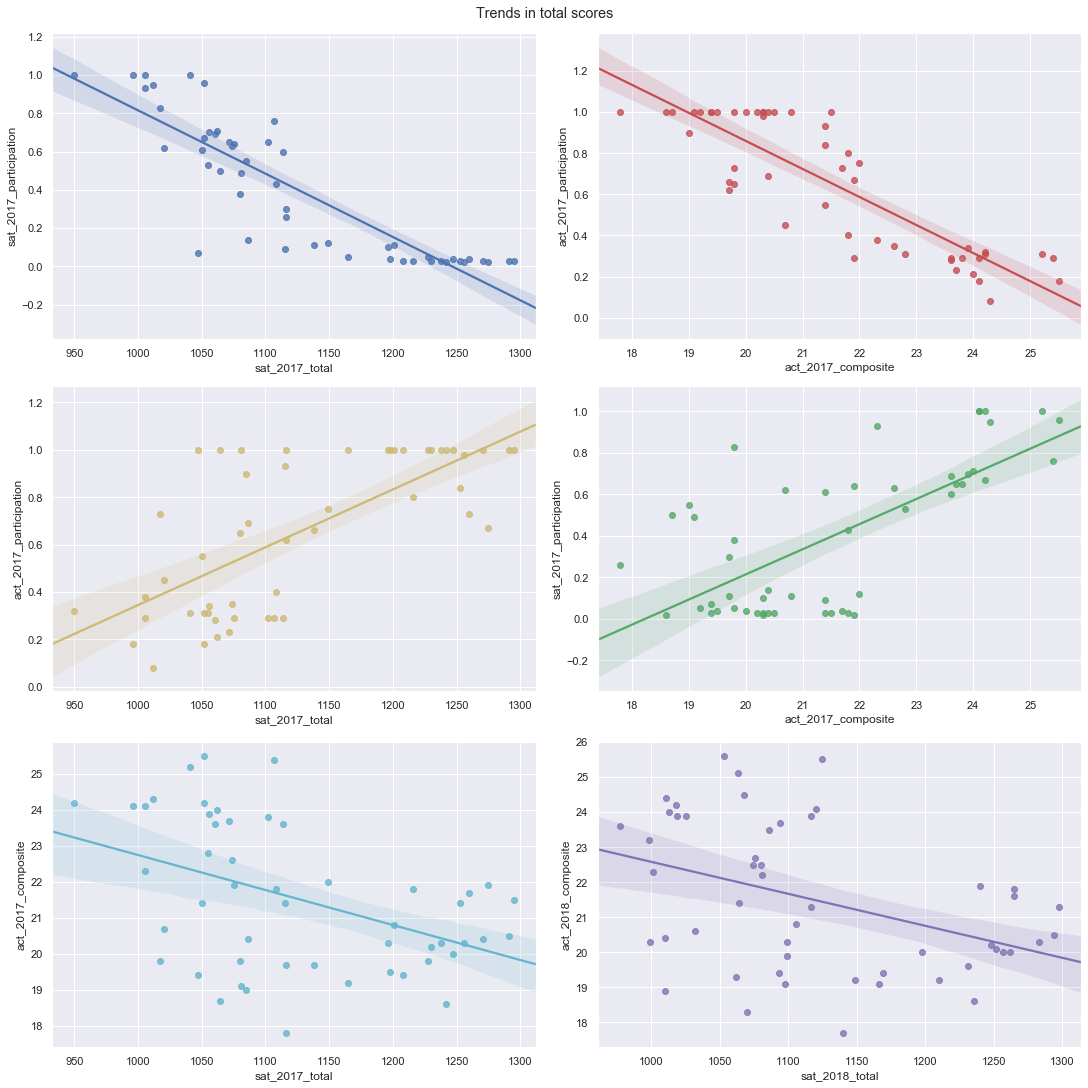

In [75]:
subplot_regplot_sns(final_df,scores_x,scores_y,scores_x_labels,scores_y_labels,scores_titles)

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [79]:
from scipy import stats

In [80]:
for i in num_final_df.columns:
    print(stats.describe(num_final_df[i]))
    print(num_final_df[i].describe()[['25%', '50%', '75%','std']])
    p = stats.normaltest(num_final_df[i])[1]
    alpha = 0.05
    print(f'p = {p}')
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print()

DescribeResult(nobs=51, minmax=(0.02, 1.0), mean=0.3980392156862746, variance=0.12444407843137252, skewness=0.33617543925343585, kurtosis=-1.36438250745446)
25%    0.040000
50%    0.380000
75%    0.660000
std    0.352766
Name: sat_2017_participation, dtype: float64
p = 4.02894334576706e-06
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(482, 644), mean=569.1176470588235, variance=2085.465882352941, skewness=0.2646065965076702, kurtosis=-1.2193513240314324)
25%    533.500000
50%    559.000000
75%    613.000000
std     45.666901
Name: sat_2017_evidence-based_reading_and_writing, dtype: float64
p = 0.0009986795076584
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(468, 651), mean=556.8823529411765, variance=2220.4258823529412, skewness=0.35421485843432615, kurtosis=-0.9529168250264535)
25%    523.500000
50%    548.000000
75%    599.000000
std     47.121395
Name: sat_2017_math, dtype: float64
p = 0.056072998982864684
The null hypothesis cannot be r

Answers:
### From the following stats, every one of them supposedly does not follow a normal distribution except for SAT math

DescribeResult(nobs=51, minmax=(0.02, 1.0), mean=0.3980392156862746, variance=0.12444407843137252, skewness=0.33617543925343585, kurtosis=-1.36438250745446)
25%    0.040000
50%    0.380000
75%    0.660000
std    0.352766
Name: sat_2017_participation, dtype: float64
p = 4.02894334576706e-06
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(482, 644), mean=569.1176470588235, variance=2085.465882352941, skewness=0.2646065965076702, kurtosis=-1.2193513240314324)
25%    533.500000
50%    559.000000
75%    613.000000
std     45.666901
Name: sat_2017_evidence-based_reading_and_writing, dtype: float64
p = 0.0009986795076584
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(468, 651), mean=556.8823529411765, variance=2220.4258823529412, skewness=0.35421485843432615, kurtosis=-0.9529168250264535)
25%    523.500000
50%    548.000000
75%    599.000000
std     47.121395
Name: sat_2017_math, dtype: float64
p = 0.056072998982864684
The null hypothesis cannot be rejected

DescribeResult(nobs=51, minmax=(950, 1295), mean=1126.0980392156862, variance=8555.290196078431, skewness=0.30168334986069095, kurtosis=-1.115401327253391)
25%    1055.500000
50%    1107.000000
75%    1212.000000
std      92.494812
Name: sat_2017_total, dtype: float64
p = 0.008200230814088539
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(0.08, 1.0), mean=0.6525490196078432, variance=0.10330337254901961, skewness=-0.19211796242279894, kurtosis=-1.591690103278791)
25%    0.310000
50%    0.690000
75%    1.000000
std    0.321408
Name: act_2017_participation, dtype: float64
p = 1.8018419611696658e-16
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(16.3, 25.5), mean=20.931372549019613, variance=5.5397960784313725, skewness=0.34220217359811805, kurtosis=-0.9108196437488862)
25%    19.000000
50%    20.700000
75%    23.300000
std     2.353677
Name: act_2017_english, dtype: float64
p = 0.08434764489205682
The null hypothesis cannot be rejected

DescribeResult(nobs=51, minmax=(18.0, 25.3), mean=21.182352941176468, variance=3.928282352941177, skewness=0.3228174361152988, kurtosis=-1.0011927796225994)
25%    19.400000
50%    20.900000
75%    23.100000
std     1.981989
Name: act_2017_math, dtype: float64
p = 0.03786805958606832
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(18.1, 26.0), mean=22.01372549019608, variance=4.273607843137254, skewness=0.2613779187300745, kurtosis=-1.0038016291000136)
25%    20.450000
50%    21.800000
75%    24.150000
std     2.067271
Name: act_2017_reading, dtype: float64
p = 0.04396683079879635
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(18.2, 24.9), mean=21.45098039215686, variance=3.0253490196078427, skewness=0.21233390930923077, kurtosis=-0.9802268464711421)
25%    19.950000
50%    21.300000
75%    23.200000
std     1.739353
Name: act_2017_science, dtype: float64
p = 0.06388547443366324
The null hypothesis cannot be rejected

DescribeResult(nobs=51, minmax=(17.8, 25.5), mean=21.519607843137255, variance=4.083207843137255, skewness=0.3103255637098951, kurtosis=-1.00509563722202)
25%    19.800000
50%    21.400000
75%    23.600000
std     2.020695
Name: act_2017_composite, dtype: float64
p = 0.03767739587231253
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(0.02, 1.0), mean=0.4574509803921569, variance=0.1392353725490196, skewness=0.13218842829757055, kurtosis=-1.534728445412192)
25%    0.045000
50%    0.520000
75%    0.775000
std    0.373143
Name: sat_2018_participation, dtype: float64
p = 3.739999415853542e-12
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(480, 643), mean=563.6862745098039, variance=2256.4996078431373, skewness=0.27392797109625916, kurtosis=-1.0698603350559397)
25%    534.500000
50%    552.000000
75%    610.500000
std     47.502627
Name: sat_2018_evidence-based_reading_and_writing, dtype: float64
p = 0.01822276093099164
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(480, 655), mean=556.2352941176471, variance=2282.223529411765, skewness=0.514677775442769, kurtosis=-0.7993880380369975)
25%    522.500000
50%    544.000000
75%    593.500000
std     47.772623
Name: sat_2018_math, dtype: float64
p = 0.08866620599134843
The null hypothesis cannot be rejected

DescribeResult(nobs=51, minmax=(977, 1298), mean=1120.0196078431372, variance=8865.179607843134, skewness=0.4525994928716571, kurtosis=-1.0405575262755369)
25%    1057.500000
50%    1098.000000
75%    1204.000000
std      94.155083
Name: sat_2018_total, dtype: float64
p = 0.014558724804979849
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(0.07, 1.0), mean=0.6164705882352941, variance=0.11615129411764706, skewness=-0.021265664102340133, kurtosis=-1.6882222234466682)
25%    0.28500
50%    0.66000
75%    1.00000
std    0.34081
Name: act_2018_participation, dtype: float64
p = 1.1798576998139409e-31
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(16.6, 26.0), mean=20.988235294117647, variance=5.98465882352941, skewness=0.3604894183850984, kurtosis=-1.0848697996352685)
25%    19.100000
50%    20.200000
75%    23.700000
std     2.446356
Name: act_2018_english, dtype: float64
p = 0.011118664949764285
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(17.8, 25.2), mean=21.125490196078427, variance=4.14433725490196, skewness=0.2615541273504424, kurtosis=-1.1186567459449526)
25%    19.400000
50%    20.700000
75%    23.150000
std     2.035765
Name: act_2018_math, dtype: float64
p = 0.008678423456739134
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(18.0, 26.1), mean=22.015686274509804, variance=4.696949019607842, skewness=0.1953899076147242, kurtosis=-1.1249632860928789)
25%    20.450000
50%    21.600000
75%    24.100000
std     2.167245
Name: act_2018_reading, dtype: float64
p = 0.009055804952130748
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(17.9, 24.9), mean=21.345098039215685, variance=3.4973254901960775, skewness=0.16727084253293434, kurtosis=-1.1188753669306517)
25%    19.850000
50%    21.100000
75%    23.050000
std     1.870114
Name: act_2018_science, dtype: float64
p = 0.010625933240751445
The null hypothesis can be rejected

DescribeResult(nobs=51, minmax=(17.7, 25.6), mean=21.48627450980392, variance=4.436407843137255, skewness=0.273600443365584, kurtosis=-1.0929720522335449)
25%    19.950000
50%    21.300000
75%    23.550000
std     2.106278
Name: act_2018_composite, dtype: float64
p = 0.012862760086159716
The null hypothesis can be rejected



#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
It would seem that when p = 0.05, only 2017_sat_math and 2018_sat_math is normal. However, plotting a kernel density estimate for each test score seems to show a curve that looks fairly normal.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
### Math

**Name: sat_2017_math, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(468, 651),  
mean=556.8823529411765,  
variance=2220.4258823529412,  
skewness=0.35421485843432615,  
kurtosis=-0.9529168250264535)  
25% =  523.5  
50% =   548.0  
75% =   599.0  
std  =   47.121395  
p = 0.056072998982864684  
The null hypothesis cannot be rejected (we cannot say it is not normal)

**Name: act_2017_math, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(18.0, 25.3),   
mean=21.182352941176468,  
variance=3.928282352941177,  
skewness=0.3228174361152988,  
kurtosis=-1.0011927796225994)  
25%  =  19.4  
50%   = 20.9  
75%   = 23.1  
std  =  1.981989  
p = 0.03786805958606832  
The null hypothesis can be rejected (it is not normal)

**Name: sat_2018_math, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(480, 655),   
mean=556.2352941176471,  
variance=2282.223529411765,  
skewness=0.514677775442769,  
kurtosis=-0.7993880380369975)  
25% =   522.5   
50%  =  544.0  
75%  =  593.5  
std  =  47.772623  
p = 0.08866620599134843  
The null hypothesis cannot be rejected (we cannot say it is not normal)

**Name: act_2018_math, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(17.8, 25.2),  
mean=21.125490196078427,   
variance=4.14433725490196,  
skewness=0.2615541273504424,  
kurtosis=-1.1186567459449526)   
25%   = 19.40  
50%   = 20.70  
75%  =  23.15  
std  =  2.035765  
p = 0.008678423456739134  
The null hypothesis can be rejected  (it is not normal)

### Reading

**Name: sat_2017_evidence-based_reading_and_writing, dtype: float64**    
DescribeResult  
(nobs=51, minmax=(482, 644),  
mean=569.1176470588235,  
variance=2085.465882352941,  
skewness=0.2646065965076702,  
kurtosis=-1.2193513240314324)  
25%  =  533.5  
50%   = 559.0   
75%   = 613.0    
std  =  45.666901  
p = 0.0009986795076584  
The null hypothesis can be rejected   (it is not normal)

**Name: act_2017_reading, dtype: float64**   
DescribeResult  
(nobs=51, minmax=(18.1, 26.0),  
mean=22.01372549019608,  
variance=4.273607843137254,  
skewness=0.2613779187300745,  
kurtosis=-1.0038016291000136)  
25%  =  20.45  
50%  =  21.80  
75%  =  24.15   
std   =  2.067271  
p = 0.04396683079879635  
The null hypothesis can be rejected   (it is not normal)

**Name: sat_2018_evidence-based_reading_and_writing, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(480, 643),  
mean=563.6862745098039,  
variance=2256.4996078431373,  
skewness=0.27392797109625916,  
kurtosis=-1.0698603350559397)  
25%  =  534.5  
50%  = 552.0  
75%  =  610.5  
std  =  47.502627  
p = 0.01822276093099164  
The null hypothesis can be rejected    (it is not normal)

**Name: act_2018_reading, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(18.0, 26.1),  
mean=22.015686274509804,   
variance=4.696949019607842,  
skewness=0.1953899076147242,  
kurtosis=-1.1249632860928789)  
25%  =  20.45  
50%  =  21.60  
75%  =  24.10  
std  =   2.167245  
p = 0.009055804952130748  
The null hypothesis can be rejected    (it is not normal)

### Participation rates

**Name: sat_2017_participation, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(0.02, 1.0),  
mean=0.3980392156862746,  
variance=0.12444407843137252,  
skewness=0.33617543925343585,  
kurtosis=-1.36438250745446)   
25%  =  0.04  
50%  =  0.38  
75%  =  0.66  
std =   0.352766  
p = 4.02894334576706e-06  
The null hypothesis can be rejected  (it is not normal)


**Name: act_2017_participation, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(0.08, 1.0),   
mean=0.6525490196078432,  
variance=0.10330337254901961,  
skewness=-0.19211796242279894,   
kurtosis=-1.591690103278791)  
25%  =  0.31  
50%  =  0.69  
75%  =  1.00  
std =  0.321408
p = 1.8018419611696658e-16  
The null hypothesis can be rejected    (it is not normal)

**Name: sat_2018_participation, dtype: float64**  
DescribeResult  
(nobs=51, minmax=(0.02, 1.0),  
mean=0.4574509803921569,  
variance=0.1392353725490196,  
skewness=0.13218842829757055,  
kurtosis=-1.534728445412192)  
25%  =  0.045  
50%  =  0.520  
75%  =  0.775    
std  =  0.373143  
p = 3.739999415853542e-12  
The null hypothesis can be rejected   (it is not normal)

**Name: act_2018_participation, dtype: float64**   
DescribeResult  
(nobs=51, minmax=(0.07, 1.0),  
mean=0.6164705882352941,  
variance=0.11615129411764706,  
skewness=-0.021265664102340133,  
kurtosis=-1.6882222234466682)  
25%  =  0.285  
50%  =  0.660  
75%   = 1.000  
std =   0.34081  
p = 1.1798576998139409e-31  
The null hypothesis can be rejected  (it is not normal)

### What these stats mean

It would seem that we can say with 95% certainty that all these tests aside from SAT 2017 & 2018 do not follow a normal distribution. The ideal kurtosis for a normal distribution is 3 and none of these values come close. What this means is that we would need to use the relevant tests to account for this when doing hypothesis testing.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

## Adding in population size to the dataset

In [81]:
pop_df = pd.read_csv('2017_2018_population.csv')

final_df = pd.merge(final_df,pop_df,how='left',on='state')

final_df.head()

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,1166,1.00,18.9,18.3,19.6,19.0,19.1,AL,4875120,4887871
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,1106,0.33,19.8,20.6,21.6,20.7,20.8,AK,739786,737438
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,1149,0.66,18.2,19.4,19.5,19.2,19.2,AZ,7048876,7171646
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,1169,1.00,19.1,18.9,19.7,19.4,19.4,AR,3002997,3013825
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,1076,0.27,22.5,22.5,23.0,22.1,22.7,CA,39399349,39557045


#### Plotting a graph showing the relationship between 2017 participation for SAT and ACT and population size

Text(0.5, 1.0, 'sat 2017 and act 2017 participation and population size')

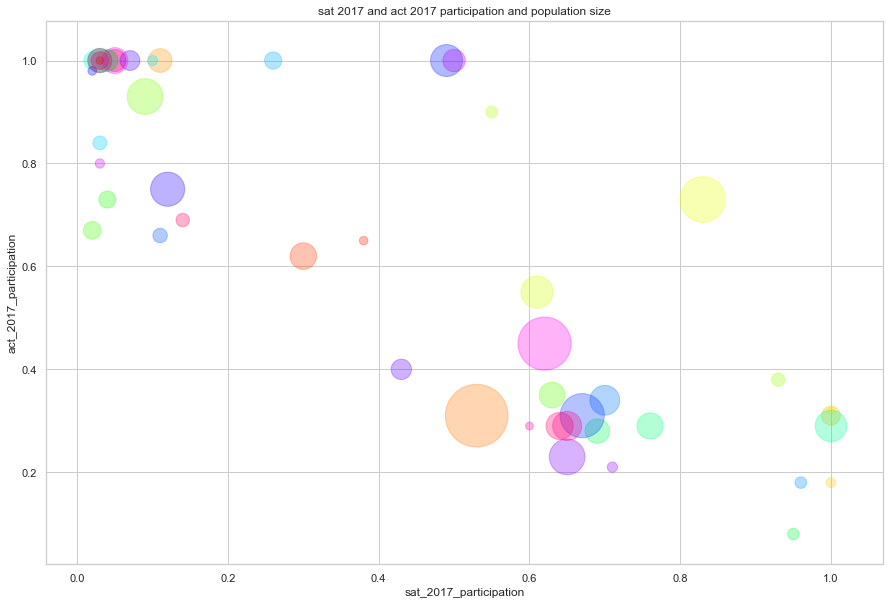

In [82]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15,10))
colors = np.linspace(0,1,len(final_df))
plt.scatter(final_df["sat_2017_participation"], final_df["act_2017_participation"], 
            c=colors, s=final_df['2017_population']/10000, alpha =0.3,
            cmap='hsv');
plt.xlabel('sat_2017_participation')
plt.ylabel('act_2017_participation')
plt.title('sat 2017 and act 2017 participation and population size')

Answer: 
Depending on what tests are being run, it may not totally make sense to conduct statistical inference. What we have are the means of each of the 50 states. However because the ones at the extreme ends of the graph (top left and bottom right) tend to be the smaller states, their adding in their means will heavily skew the distribution. For example, California had a population of 39 million in 2017, which is more than the 17 states with full attendance for the ACT test combined. This might be the reason why we arent getting a normal distribution: the sample sizes we are drawing from these 50 states are not simillar in size.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Text(0.5, 1.0, 'sat 2018 and act 2018 math scores and population size')

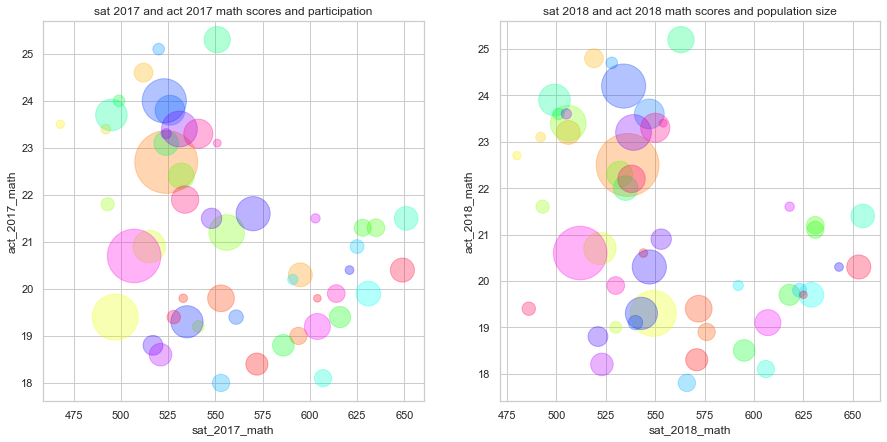

In [83]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
colors = np.linspace(0,1,len(final_df))
plt.scatter(final_df["sat_2017_math"], final_df["act_2017_math"], 
            c=colors, s=final_df['2018_population']/10000, alpha =0.3,
            cmap='hsv');
plt.xlabel('sat_2017_math')
plt.ylabel('act_2017_math')
plt.title('sat 2017 and act 2017 math scores and participation')

ax2 = plt.subplot(1,2,2)
colors = np.linspace(0,1,len(final_df))
plt.scatter(final_df["sat_2018_math"], final_df["act_2018_math"], 
            c=colors, s=final_df['2018_population']/10000, alpha =0.3,
            cmap='hsv');
plt.xlabel('sat_2018_math')
plt.ylabel('act_2018_math')
plt.title('sat 2018 and act 2018 math scores and population size')

Answer: No. larger states tend to not be found on the extremes of the graphs. Using just one number to represent such a large amount of people without first adjusting the scores would lead to an inaccurate representation of the population. This also what is causing our data to not follow a normal distribution

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [84]:
x = ['sat_2017_math','sat_2018_math', 'sat_2017_total','act_2017_composite','act_2017_math','act_2018_math']
y = ['sat_2017_evidence-based_reading_and_writing','sat_2018_evidence-based_reading_and_writing', 
     'sat_2018_total','act_2018_composite','act_2017_reading','act_2018_reading']
for iv,dv in zip(x,y):
    t_stat, p_value =stats.ttest_rel(final_df[iv],final_df[dv])
    print(f'Comparing {iv} to {dv}...')
    print(f't_stat:{t_stat} p_value = {p_value}')
    if (p_value<0.05):
        print(f'The null hypothesis can be rejected: {iv} is different from {dv}.')
    else:
        print(f'The null hypothesis cannot be rejected: {iv} is not different from {dv}.')
    print()


Comparing sat_2017_math to sat_2017_evidence-based_reading_and_writing...
t_stat:-11.490718975935613 p_value = 1.2223269308146973e-15
The null hypothesis can be rejected: sat_2017_math is different from sat_2017_evidence-based_reading_and_writing.

Comparing sat_2018_math to sat_2018_evidence-based_reading_and_writing...
t_stat:-3.708688725342069 p_value = 0.0005228645173032097
The null hypothesis can be rejected: sat_2018_math is different from sat_2018_evidence-based_reading_and_writing.

Comparing sat_2017_total to sat_2018_total...
t_stat:0.8566164132913349 p_value = 0.39574391441277224
The null hypothesis cannot be rejected: sat_2017_total is not different from sat_2018_total.

Comparing act_2017_composite to act_2018_composite...
t_stat:0.3287666152209263 p_value = 0.7437051688560987
The null hypothesis cannot be rejected: act_2017_composite is not different from act_2018_composite.

Comparing act_2017_math to act_2017_reading...
t_stat:-14.225304833770277 p_value = 3.31099470618

it seems like sat math scores are significantly different from sat reading and writing scores.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [86]:
final_df.sort_values(['act_2017_participation'])

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,...,1013,0.07,23.8,23.6,24.7,23.4,24.0,ME,1335063,1338404
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,...,1063,0.16,25.1,24.7,25.6,24.4,25.1,NH,1349767,1356458
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,998,0.17,23.7,23.1,24.5,23.4,23.2,DE,957078,967171
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,1018,0.15,24.4,23.6,25.0,23.5,24.2,RI,1056486,1057315
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,...,1086,0.20,23.3,23.2,24.0,23.1,23.5,PA,12790447,12807060
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,23.2,...,1080,0.31,22.1,22.0,23.1,22.2,22.5,MD,6024891,6042718
45,Vermont,0.60,562,551,1114,0.29,23.3,23.1,24.4,23.2,...,1120,0.24,23.9,23.4,24.9,23.8,24.1,VT,624525,626299
21,Massachusetts,0.76,555,551,1107,0.29,25.4,25.3,25.9,24.7,...,1125,0.25,25.5,25.2,25.9,24.7,25.5,MA,6863246,6902149
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1011,0.22,24.5,23.9,24.7,23.9,24.4,MI,9976447,9995915
46,Virginia,0.65,561,541,1102,0.29,23.5,23.3,24.6,23.5,...,1117,0.24,23.8,23.3,24.7,23.5,23.9,VA,8465207,8517685


### Rhode Island
Rhode Island had a 16 % increase from the previous year, because it became mandatory to take the SAT in the year 2018. This sudden increase has also led to a drop in average scores
https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores



In [87]:
final_df.loc[final_df['state']=='Rhode Island']

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,1018,0.15,24.4,23.6,25.0,23.5,24.2,RI,1056486,1057315


### Illinois
Illinois went from a 90% participation rate in ACT with around a 10% participation rate in SAT for 2017, to a simillar ratio in the opposite direction in 2018. This is because the mandatory exam has changed from the SAT to the ACT. SAT test score averages for Illinois have dropped from 2017 to 2018, and the opposite effect was observed for the ACT.
https://www.chicagotribune.com/news/ct-illinois-sat-met-20151221-story.html

In [88]:
final_df.loc[final_df['state']=='Illinois']

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,...,1019,0.43,24.1,23.4,24.2,23.4,23.9,IL,12786196,12741080


### Ohio
In 2018, Ohio paid for all its students to take the ACT exam. According to the article that meant that "thousands of non-college-bound students who were not tested in the past were tested". This greatly increased Ohios participation rate but dipped its average ACT scores.
https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/

In [89]:
final_df.loc[final_df['state']=='Ohio']

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,...,1099,1.0,19.3,20.3,20.8,20.4,20.3,OH,11664129,11689442


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [90]:
final_df.loc[final_df['state']=='Iowa']

,state,sat_2017_participation,sat_2017_evidence-based_reading_and_writing,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,...,sat_2018_total,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite,statehash,2017_population,2018_population
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,...,1265,0.68,21.0,21.2,22.5,22.0,21.8,IA,3143637,3156145


Participation rates in one test is negatively correlated with both total scores and participation rates in the other test.  
One state I would choose is Iowa as it has the lowest participation rates across both tests for 2018. There are a few ways to increase participation rates. One easiest ways would be to either make it a mandatory test or to subsidize costs for taking the test as Iowa does neither of this. Other methods include setting the tests during school hours.
https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf


It would be better to deal with non aggregated data to have more accurate results for hypotheses testing. 